# xcube JupyterLab Integration

This Notebook demonstrates how to use the features of the xcube JupyterLab integration.
The Notebook demonstrates two scenarios how xcube Viewer is utilized in JupyterLab.
In particular, we open xcube Viewer for any `xarray.Dataset` instances 

1. opened or otherwise created in this Notebook (in-memory datasets);
2. persisted in this Notebooks's workspace or from other sources (saved datasets).

For this to work, the following requirements must be satisfied:

* xcube version must be >= 0.13
* JupyterLab version must be 3.4.x
* The xcube JupyterLab extension [xcube-jl-ext](https://github.com/dcs4cop/xcube-jl-ext) 
  must be installed and enabled.

If you run JupyterLab remotely, e.g., with JupyterHub, then also

* the [jupyter-proxy](https://jupyter-server-proxy.readthedocs.io/en/latest/#) 
  server extension must be installed and enabled.
  

In [1]:
import numpy as np
import xarray as xr

from xcube.webapi.viewer import Viewer
from xcube.core.store import new_data_store
from xcube.core.select import select_subset

We create some datasets so we have something to show. We use the xcube datastore framework here to open the dataset, but it could also be opened by other means, e.g., `xr.open_dataset()`, provided it has variables with dimensions ["time", "y", "x"] or ["y", "x"]. 

In [2]:
store = new_data_store("s3", root="esdl-esdc-v2.1.1", storage_options={"anon": True})
store.list_data_ids()

d:\projects\xcube\xcube\util\plugin.py:186: UserWarning: Initializing xcube plugin 'xcube' took 225 ms, consider code optimization. (For example, avoid eager import of packages, consider lazy loading of resources, etc.)
  warnings.warn(


['esdc-8d-0.083deg-184x270x270-2.1.1.zarr',
 'esdc-8d-0.083deg-1x2160x4320-2.1.1.zarr',
 'esdc-8d-0.25deg-184x90x90-2.1.1.zarr',
 'esdc-8d-0.25deg-1x720x1440-2.1.1.zarr']

In [3]:
dataset = store.open_data('esdc-8d-0.083deg-1x2160x4320-2.1.1.zarr')

In [18]:
dataset_subset = select_subset(
    dataset,
    bbox=[6, 54, 14, 74],
    time_range=['2016-06-01', '2016-06-30'],
    var_names=['analysed_sst']
)
dataset_subset.attrs["title"] = "My ESDC Subset"
dataset_subset

<xarray.Dataset>
Dimensions:       (time: 4, lat: 240, lon: 96, bnds: 2)
Coordinates:
  * lat           (lat) float64 73.96 73.88 73.79 73.71 ... 54.21 54.12 54.04
    lat_bnds      (lat, bnds) float64 dask.array<chunksize=(240, 2), meta=np.ndarray>
  * lon           (lon) float64 6.042 6.125 6.208 6.292 ... 13.79 13.87 13.96
    lon_bnds      (lon, bnds) float64 dask.array<chunksize=(96, 2), meta=np.ndarray>
  * time          (time) datetime64[ns] 2016-06-05 2016-06-13 ... 2016-06-29
    time_bnds     (time, bnds) datetime64[ns] dask.array<chunksize=(4, 2), meta=np.ndarray>
Dimensions without coordinates: bnds
Data variables:
    analysed_sst  (time, lat, lon) float64 dask.array<chunksize=(1, 240, 96), meta=np.ndarray>
Attributes: (12/35)
    Metadata_conventions :     Unidata Dataset Discovery v1.0
    acknowledgment:            The ESDL team acknowledges all data providers! 
    chunking:                  1x2160x4320
    comment:                   none. 
    contributor_name:          Max Planck Institute for Biogeochemistry
    contributor_role:          ESDL Science Lead 
    ...                        ...
    summary:                   This data set contains a data cube of Earth Sy...
    time_coverage_duration:    P40Y
    time_coverage_end:         31.12.2018
    time_coverage_resolution:  P8D
    time_coverage_start:       05.01.1979
    title:                     My ESDC Subset

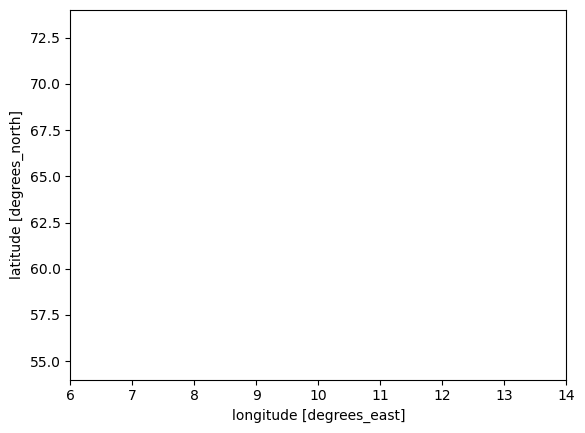

In [19]:
dataset_subset.analysed_sst.plot.imshow(vmin=270, vmax=300)

---
**Scenario 1**: Open xcube Viewer for a dataset instances opened or otherwise created in this Notebook (in-memory datasets).

In [5]:
viewer = Viewer()

In [6]:
viewer.add_dataset(dataset)
viewer.add_dataset(dataset_subset)

'af49e396-d494-4864-b924-0421123d7b26'

You can click on the viewer link to open xcube Viewer in a new browser tab:

In [7]:
viewer.info()

Server: http://localhost:8888/proxy/8001
Viewer: http://localhost:8888/proxy/8001/viewer/?serverUrl=http://localhost:8888/proxy/8001


You can also open xcube Viewer inlined here:

In [8]:
viewer.show()

---
**Scenario 2**: Open xcube Viewer for a dataset instances persisted in this Notebooks's workspace or from other sources (saved datasets).

In [9]:
dataset_subset.to_zarr("esdc-subset.zarr", mode="w")

580 GET /viewer/config/config.json (127.0.0.1): Missing entry 'Path' in 'Configuration' item of 'Viewer'
580 GET /viewer/config/config.json (127.0.0.1) 9.99ms


Now, open the JupyterLab Launcher, and select _xcube Viewer_. You should see the dataset titled "My ESDC Subset". 

You should now find two new files in your workspace, [xcube-server.yaml](./xcube-server.yaml) and [xcube-server.log](./xcube-server.log). 
The first one is the configuration file used by xcube Server and therefore determines what datasets are shown in xcube Viewer. 
The second is the server's log file which is useful for debugging, for example, you may find details here why a certain dataset is not displayed.  

Note, currently [xcube-server.yaml](./xcube-server.yaml) only applies to the server/viewer launched by the JupyterLab Launcher. It is independent from the server/viewer created from within Notebooks.